In [1]:
# import typical packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

The Cumulative KOI (Kepler Objects of Interest) table is a database of potentially Earth-like planets. From the homepage, "The first space mission to search for Earth-sized and smaller planets in the habitable zone of other stars in our neighborhood of the galaxy."

Database link: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

The CSV was downloaded from the database in full, while the option for `Values only (no errors, limits etc)` checked.

In [2]:
df = pd.read_csv("koi_data.csv", skiprows=31) # first 31 lines are comments by NASA
df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,4500.53,453.3,1.0,q1_q17_dr25_tce,5638.0,4.529,0.903,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,1585.81,10.6,1.0,q1_q17_dr25_tce,6119.0,4.444,1.031,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,5713.41,12.3,1.0,q1_q17_dr25_tce,6173.0,4.447,1.041,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,22.68,14.0,1.0,q1_q17_dr25_tce,4989.0,2.992,7.824,296.76288,47.145142,10.998


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_time0bk        9564 non-null   float64
 12  koi_impact         9201 non-null   float64
 13  koi_duration       9564 non-null   float64
 14  koi_depth          9201 non-null   float64
 15  koi_prad           9201 non-null   float64
 16  koi_teq            9201 

## The features (https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)

A comprehensive list of features can be found by following the link above, but here is a short summary of the features:

### kepid, kepoi_name
- Each planet has an integer ID and an object of interest name. 

### kepler_name, koi_disposition
- Only planets with a `koi_disposition == "CONFIRMED"` have a name.
- Other values of disposition are either `"CANDIDATE"` or `"FALSE POSITIVE"`

In [4]:
# lets say for now that we don't care about the name or ID of any of these
# -> the only dtype="object" we care for is whether the exoplanet is a confirmed or false positive.

# remove all object cols APART from the disposition
df.drop(["kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_tce_delivname"], axis=1, inplace=True)

# now, we only care for disposition in ["CONFIRMED", "FALSE POSITIVE"]:
df = df[df["koi_disposition"].isin(["CONFIRMED", "FALSE POSITIVE"])].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7585 entries, 0 to 9563
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   7585 non-null   object 
 1   koi_score         6675 non-null   float64
 2   koi_fpflag_nt     7585 non-null   int64  
 3   koi_fpflag_ss     7585 non-null   int64  
 4   koi_fpflag_co     7585 non-null   int64  
 5   koi_fpflag_ec     7585 non-null   int64  
 6   koi_period        7585 non-null   float64
 7   koi_time0bk       7585 non-null   float64
 8   koi_impact        7326 non-null   float64
 9   koi_duration      7585 non-null   float64
 10  koi_depth         7326 non-null   float64
 11  koi_prad          7326 non-null   float64
 12  koi_teq           7326 non-null   float64
 13  koi_insol         7366 non-null   float64
 14  koi_model_snr     7326 non-null   float64
 15  koi_tce_plnt_num  7299 non-null   float64
 16  koi_steff         7326 non-null   float64
 17  

In [5]:
# now we have all numerical values of each CONFIRMED or FALSE POSITIVE sample, we can also drop the koi_score since we dont need it
df.drop(["koi_score"], axis=1, inplace=True)
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,CONFIRMED,0,0,0,0,11.094321,171.201160,0.538,4.59450,1517.5,...,835.0,114.81,66.5,1.0,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9557,FALSE POSITIVE,1,0,0,0,373.893980,261.496800,0.963,27.66000,730.0,...,206.0,0.42,18.5,3.0,5263.0,4.574,0.699,290.93597,47.290730,14.911
9558,FALSE POSITIVE,0,0,0,1,8.589871,132.016100,0.765,4.80600,87.7,...,929.0,176.40,8.4,1.0,5638.0,4.296,1.088,298.74921,46.973351,14.478
9559,FALSE POSITIVE,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,...,2088.0,4500.53,453.3,1.0,5638.0,4.529,0.903,297.18875,47.093819,14.082
9561,FALSE POSITIVE,0,0,1,0,0.681402,132.181750,0.147,0.86500,103.6,...,2218.0,5713.41,12.3,1.0,6173.0,4.447,1.041,294.16489,47.176281,15.385


In [6]:
# have a look at remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7585 entries, 0 to 9563
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   7585 non-null   object 
 1   koi_fpflag_nt     7585 non-null   int64  
 2   koi_fpflag_ss     7585 non-null   int64  
 3   koi_fpflag_co     7585 non-null   int64  
 4   koi_fpflag_ec     7585 non-null   int64  
 5   koi_period        7585 non-null   float64
 6   koi_time0bk       7585 non-null   float64
 7   koi_impact        7326 non-null   float64
 8   koi_duration      7585 non-null   float64
 9   koi_depth         7326 non-null   float64
 10  koi_prad          7326 non-null   float64
 11  koi_teq           7326 non-null   float64
 12  koi_insol         7366 non-null   float64
 13  koi_model_snr     7326 non-null   float64
 14  koi_tce_plnt_num  7299 non-null   float64
 15  koi_steff         7326 non-null   float64
 16  koi_slogg         7326 non-null   float64
 17  

---

## Checkpoint

We now have a set of features. Some are raw, some derived from light-curves or other input catalogues, but none post-hoc, so we can use them to try and build a model to predict the disposition.

## Preprocessing

Now, we begin the data preprocessing and model selection stage.

In [7]:
# turn "koi_disposition" into labels.
# we will have CONFIRMED <=> 1, FALSE POSITIVE <=> 0:

label_dict = {
    "CONFIRMED": 1,
    "FALSE POSITIVE": 0
}

df["koi_disposition"] = df["koi_disposition"].map(label_dict)
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
3,0,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,1,0,0,0,0,11.094321,171.201160,0.538,4.59450,1517.5,...,835.0,114.81,66.5,1.0,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9557,0,1,0,0,0,373.893980,261.496800,0.963,27.66000,730.0,...,206.0,0.42,18.5,3.0,5263.0,4.574,0.699,290.93597,47.290730,14.911
9558,0,0,0,0,1,8.589871,132.016100,0.765,4.80600,87.7,...,929.0,176.40,8.4,1.0,5638.0,4.296,1.088,298.74921,46.973351,14.478
9559,0,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,...,2088.0,4500.53,453.3,1.0,5638.0,4.529,0.903,297.18875,47.093819,14.082
9561,0,0,0,1,0,0.681402,132.181750,0.147,0.86500,103.6,...,2218.0,5713.41,12.3,1.0,6173.0,4.447,1.041,294.16489,47.176281,15.385


In [8]:
# now, split into X, y data:

X = df.drop(columns=["koi_disposition"], axis=1)
y = df["koi_disposition"]

# firstly, we want to check the proportions of 0:1 in our target classes...
print(y.value_counts())
print("=========================================\nRatio of 0:1: ", y.value_counts()[0] / y.value_counts()[1])

koi_disposition
0    4839
1    2746
Name: count, dtype: int64
Ratio of 0:1:  1.7621995630007283


In [9]:
# we will start with a random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# split into train and test (80:20)
# want to stratify y in order to keep the class proportionality
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

# create an instance of random forest
rf = RandomForestClassifier(random_state=2, n_estimators=100)
rf.fit(X_train, y_train)

y_preds = rf.predict(X_test)

# simple model evaluation
print(classification_report(y_test, y_preds, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0     0.9898    1.0000    0.9949       968
           1     1.0000    0.9818    0.9908       549

    accuracy                         0.9934      1517
   macro avg     0.9949    0.9909    0.9928      1517
weighted avg     0.9935    0.9934    0.9934      1517

Confusion Matrix:
 [[968   0]
 [ 10 539]]


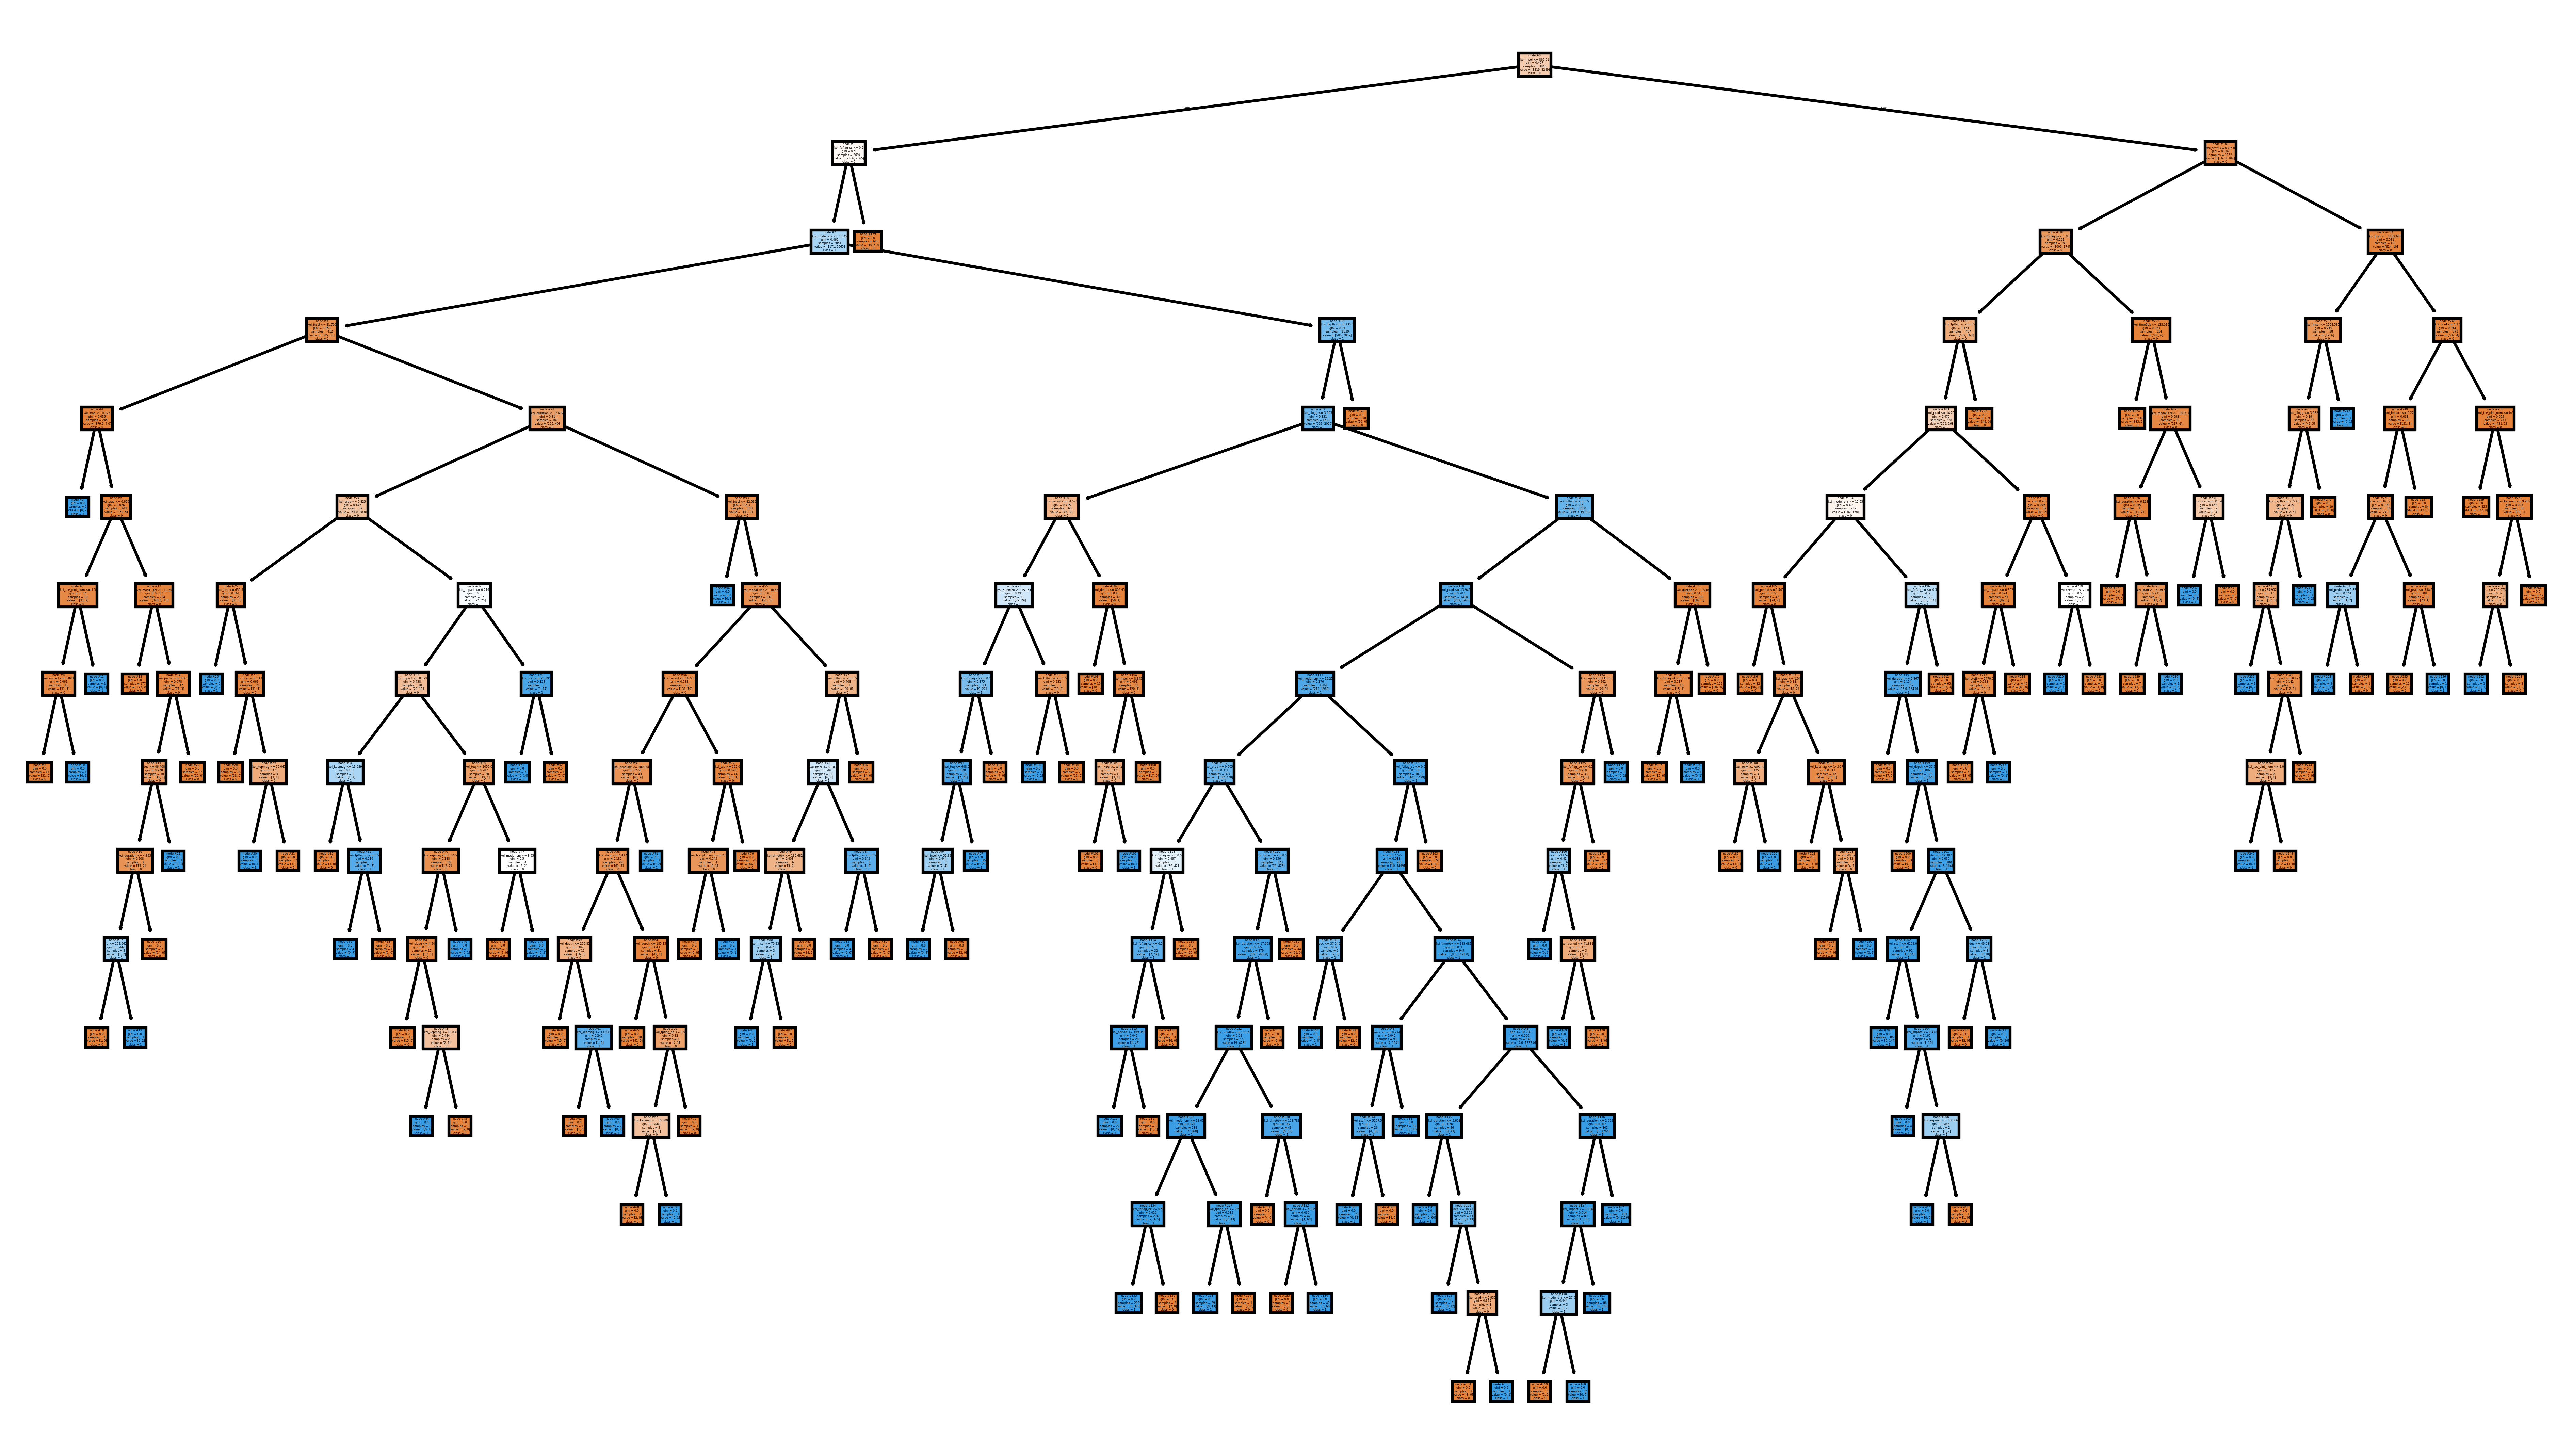

In [32]:
# want to visualise the forest
from sklearn import tree

fig, axs = plt.subplots(1, 1, figsize=(16,9), dpi=600)
tree = tree.plot_tree(
    rf.estimators_[0],
    feature_names=X.columns, 
    class_names=["0", "1"],
    filled=True,
    node_ids=True,
    ax=axs
)

fig.savefig('rf_full_tree.png', bbox_inches="tight")

In [39]:
# go back to my undergrad project and steal the code from the nice confusion matrices
# (I will paste the raw cell into the file called "cm_code.py", direct from my corsework)

def make_cm_plot(y_test, y_preds, labels=None):
    cm = confusion_matrix(y_test, y_preds)

    # if labels and length of matrix don't match, let the user know and just dont use labels
    if labels is not None and len(labels) != cm.shape[1]:
        print("Warning:\n    Number of labels given doesn't match the shape of the confusion matrix")
        labels = None

    # efficiency + uncertainty functions
    def eff(m, n):
        return m/n
        
    def uncertainty(m, n):
        return np.sqrt(eff(m, n) * (1 - eff(m, n))/n)

    # Create efficiency and uncertainty arrays
    eff_matrix = np.zeros_like(cm, dtype=float)
    uncertainty_matrix = np.zeros_like(cm, dtype=float)
    
    # Fill the matrices with efficiency and uncertainty
    for i in range(len(labels)):
        for j in range(len(labels)):
            total = np.sum(cm[i])  # Total for the true class (row sum)
            count = cm[i, j]  # Number of predictions made by the model
            
            if total > 0:
                eff_matrix[i, j] = eff(count, total)
                uncertainty_matrix[i, j] = uncertainty(count, total)
    
    # Create formatted labels that include efficiency + uncertainty and tally
    formatted_values = []
    for i in range(len(labels)):
        row = []
        for j in range(len(labels)):
            eff_val = r'$\mathbf{' + f'{eff_matrix[i, j]*100:.2g}' + r'\%}$'
            unc_val = r'$\mathbf{' + f'{uncertainty_matrix[i, j]*100:.2g}' + r'\%}$'
            tally = f'({cm[i, j]})'  # Raw count
            
            # Combine efficiency, uncertainty, and tally
            pm = r"$\pm$"
            formatted_string = f'{eff_val} {pm} {unc_val}\n\n{tally}'
            row.append(formatted_string)
        formatted_values.append(row)
    
    # Plotting the confusion matrix with efficiency, uncertainty, and tally
    plt.figure(figsize=(12.8,7.2))
    
    sns.heatmap(cm, annot=formatted_values, fmt='', cmap='Purples', 
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('------------------------------------ Predicted Labels ------------------------------------')
    plt.ylabel('-------------------------- True Labels --------------------------')
    plt.tight_layout()
    plt.show()
    
    print(f"Accuracy: {eff(np.trace(cm), np.sum(cm))*100:2f}%")
    print(f"Uncertainty: {uncertainty(np.trace(cm), np.sum(cm))*100:2f}%")

<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:43: SyntaxWarning: invalid escape sequence '\p'
C:\Users\benco\AppData\Local\Temp\ipykernel_31352\2192075129.py:43: SyntaxWarning: invalid escape sequence '\p'
  formatted_string = f'{eff_val} $\pm$ {unc_val}\n\n{tally}'


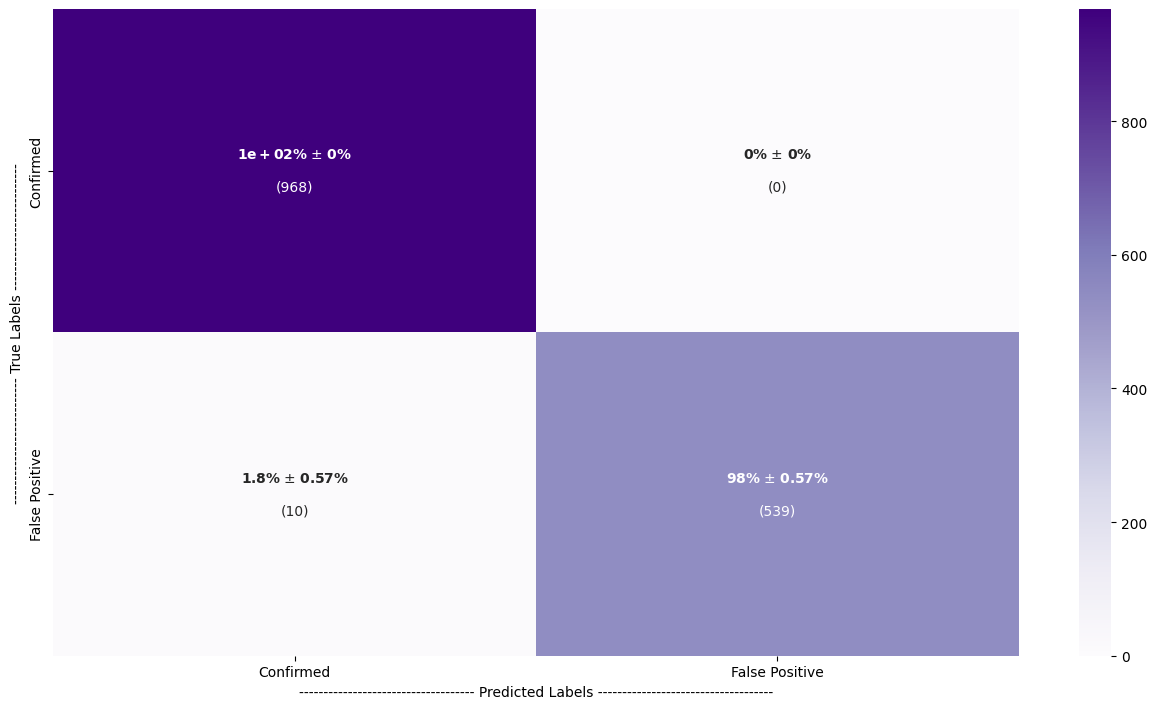

Accuracy: 99.340804%
Uncertainty: 0.207768%


In [40]:
make_cm_plot(y_test, y_preds, ["Confirmed", "False Positive"])

## Takeaways

Now that we have an accurate model, what next?

1. What features are the most prominent in the forest?
2. Are those features consistent with what the physics tell us?
3. If they are, how can NASA adjust their observational studies/surveys so that they can aim their scopes at the important features?

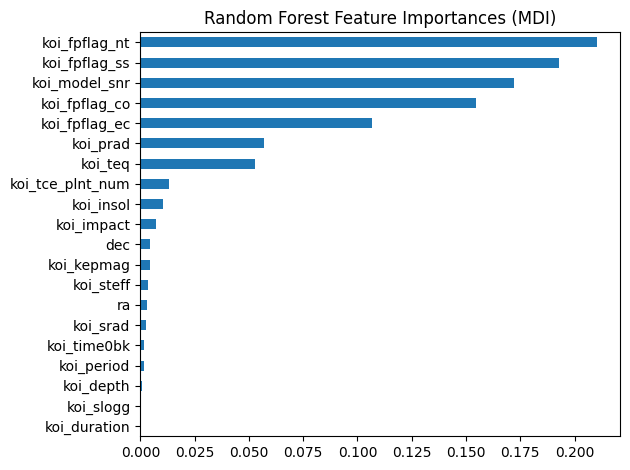

In [42]:
# We have a few methods of measureing feature impact on a tree.
#
# 1. mean decrease in impurity (MDI)
# code adapted: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

mdi_importances = pd.Series(
    rf[-1].feature_importances_, index=X.columns
).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

## Top contributors

1. `koi_fpflag_nt`, `koi_kpflag_ss`, `koi_model_snr`, `koi_kpflag_ec`, `koi_fpflag_ec`